In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from xgboost import XGBRegressor

In [3]:
df = pd.read_csv(r'C:\Users\muska\Downloads\processed_data.csv')
df

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Item_Visibility_Bins,Years_Since_Establishment,Item_Fat_Content_Regular,Item_Type_Breads,...,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Visibility_Log
0,9.300,0.016047,249.8092,2346.861865,1999,3735.1380,0.0,25,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.015920
1,5.920,0.019278,48.2692,1997.173039,2009,443.4228,0.0,15,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.019095
2,17.500,0.016760,141.6180,2348.624909,1999,2097.2700,0.0,25,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.016621
3,19.200,0.000000,182.0950,338.642225,1998,732.3800,0.0,26,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.000000
4,8.930,0.000000,53.8614,2300.396212,1987,994.7052,0.0,37,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2298.480338,1987,2778.3834,1.0,37,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.055230
8519,8.380,0.046982,108.1570,2194.155379,2002,549.2850,0.0,22,1.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.045912
8520,10.600,0.035186,85.1224,2440.182801,2004,1193.1136,0.0,20,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.034581
8521,7.210,0.145221,103.1332,1995.660445,2009,1845.5976,1.0,15,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.135597


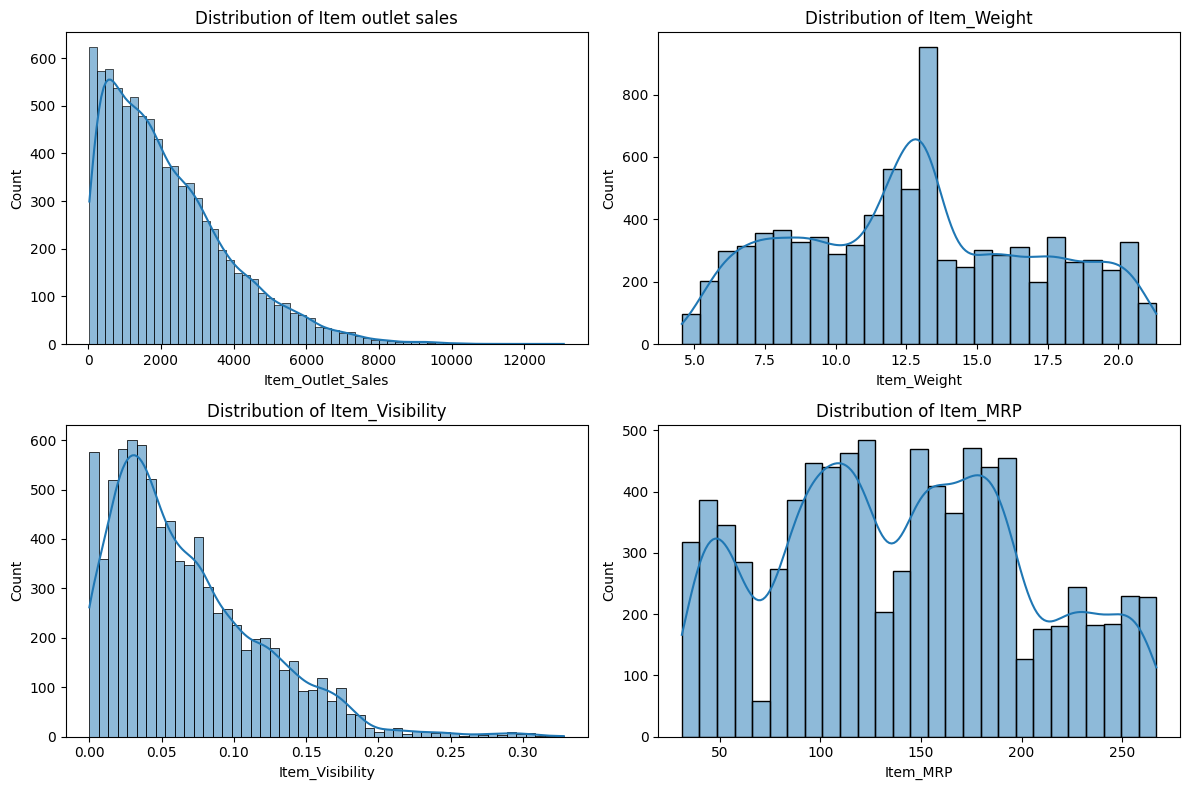

In [4]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.histplot(df['Item_Outlet_Sales'],kde=True)
plt.title("Distribution of Item outlet sales")

plt.subplot(2, 2, 2)
sns.histplot(df['Item_Weight'], kde=True)
plt.title('Distribution of Item_Weight')

plt.subplot(2, 2, 3)
sns.histplot(df['Item_Visibility'], kde=True)
plt.title('Distribution of Item_Visibility')

plt.subplot(2, 2, 4)
sns.histplot(df['Item_MRP'], kde=True)
plt.title('Distribution of Item_MRP')

plt.tight_layout()
plt.show()

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Generating a sample dataset
np.random.seed(0)
sample_size = 100
feature1 = np.random.rand(sample_size) * 10
target = 2 * feature1 + np.random.normal(0, 1, sample_size)  # Positive correlation
feature2 = -1 * feature1 + np.random.normal(0, 1, sample_size)  # Negative correlation
feature3 = np.random.rand(sample_size) * 5  # Neutral correlation
feature4 = feature1 * 0.1 + np.random.normal(0, 1, sample_size)  # Low positive correlation

# Creating the DataFrame
sample_data = pd.DataFrame({
    'Feature1_Positive': feature1,
    'Feature2_Negative': feature2,
    'Feature3_Neutral': feature3,
    'Feature4_LowPositive': feature4,
    'Target': target
})

In [6]:
sample_data

,Feature1_Positive,Feature2_Negative,Feature3_Neutral,Feature4_LowPositive,Target
0,5.488135,-5.842129,4.410207,-0.103480,9.811120
1,7.151894,-8.526845,2.293020,0.194000,15.204614
2,6.027634,-6.671252,3.620838,-1.240306,12.520930
3,5.448832,-7.672235,1.995127,0.066909,9.361420
4,4.236548,-3.611317,4.520222,-0.056001,9.961348
...,...,...,...,...,...
95,1.831914,-2.222867,4.408601,0.072802,4.345422
96,5.865129,-5.371388,1.362184,-0.468116,10.926849
97,0.201075,-0.317179,1.895284,0.840355,-0.287399
98,8.289400,-10.320085,1.871481,1.292070,16.123268


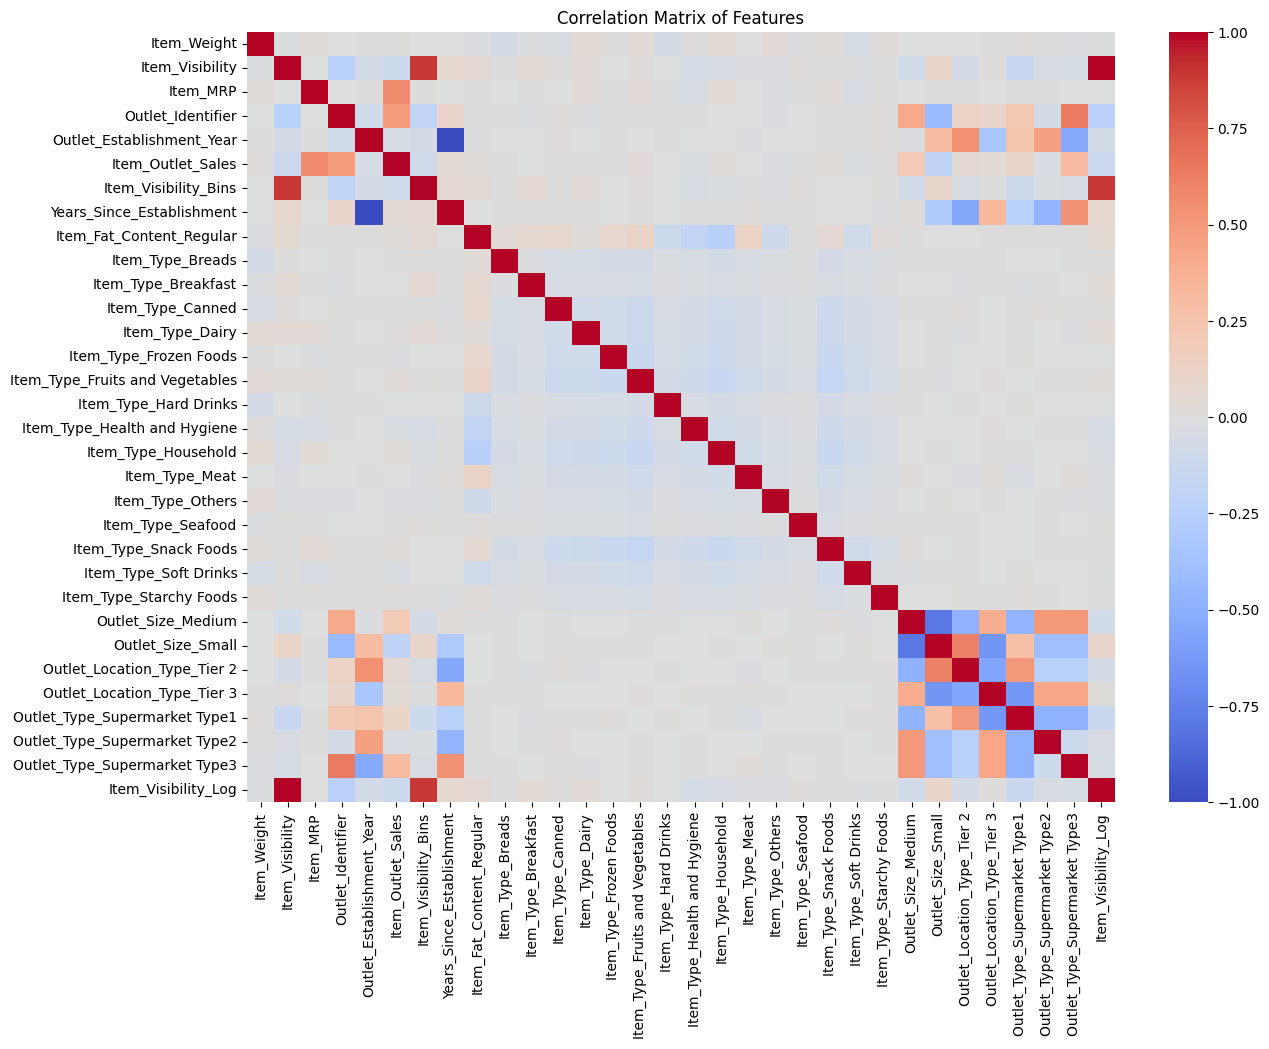

In [8]:
# Correlation analysis
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Matrix of Features")
plt.show()

In [9]:
target_correlation = correlation_matrix['Item_Outlet_Sales'].sort_values(ascending=False).round(1)
print(target_correlation)

Item_Outlet_Sales                  1.0
Item_MRP                           0.6
Outlet_Identifier                  0.5
Outlet_Type_Supermarket Type3      0.3
Outlet_Size_Medium                 0.2
Outlet_Type_Supermarket Type1      0.1
Outlet_Location_Type_Tier 2        0.1
Years_Since_Establishment          0.0
Outlet_Location_Type_Tier 3        0.0
Item_Type_Fruits and Vegetables    0.0
Item_Type_Snack Foods              0.0
Item_Fat_Content_Regular           0.0
Item_Type_Household                0.0
Item_Type_Starchy Foods            0.0
Item_Weight                        0.0
Item_Type_Dairy                    0.0
Item_Type_Canned                   0.0
Item_Type_Seafood                  0.0
Item_Type_Breads                   0.0
Item_Type_Meat                    -0.0
Item_Type_Hard Drinks             -0.0
Item_Type_Breakfast               -0.0
Item_Type_Frozen Foods            -0.0
Item_Type_Others                  -0.0
Item_Type_Soft Drinks             -0.0
Item_Type_Health and Hygi

In [10]:
features = [
    "Item_MRP",
    "Outlet_Identifier",
    "Outlet_Type_Supermarket Type3",
    "Outlet_Size_Medium",
    "Outlet_Type_Supermarket Type1",
    "Outlet_Location_Type_Tier 2",
    "Years_Since_Establishment",
    "Outlet_Location_Type_Tier 3",
    "Item_Type_Fruits and Vegetables",
    "Item_Type_Snack Foods",
    "Item_Fat_Content_Regular",
    "Item_Type_Household",
    "Item_Type_Starchy Foods",
    "Item_Weight",
    "Item_Type_Dairy",
    "Item_Type_Canned",
    "Item_Type_Seafood",
    "Item_Type_Breads",
    "Item_Type_Meat",
    "Item_Type_Hard Drinks",
    "Item_Type_Breakfast",
    "Item_Type_Frozen Foods",
    "Item_Type_Others",
    "Item_Type_Soft Drinks",
    "Item_Type_Health and Hygiene",
    "Outlet_Type_Supermarket Type2",
    "Outlet_Establishment_Year",
    "Item_Visibility_Bins",
    "Item_Visibility_Log",
    "Item_Visibility",
    "Outlet_Size_Small"
]

In [11]:
x=df[features]
y=df['Item_Outlet_Sales']

In [12]:
# Split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = LinearRegression()
# Fit the model on the training data
model.fit(x_train, y_train)

# Now, you can make predictions on the test data
y_pred = model.predict(x_test)

In [13]:
model.fit(x_train,y_train)

LinearRegression()

In [14]:
r2=r2_score(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))

In [15]:
print(f"\nModel Performance:")
print(f"R² Score: {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")


Model Performance:
R² Score: 0.58
Mean Absolute Error (MAE): 793.86
Root Mean Squared Error (RMSE): 1071.37


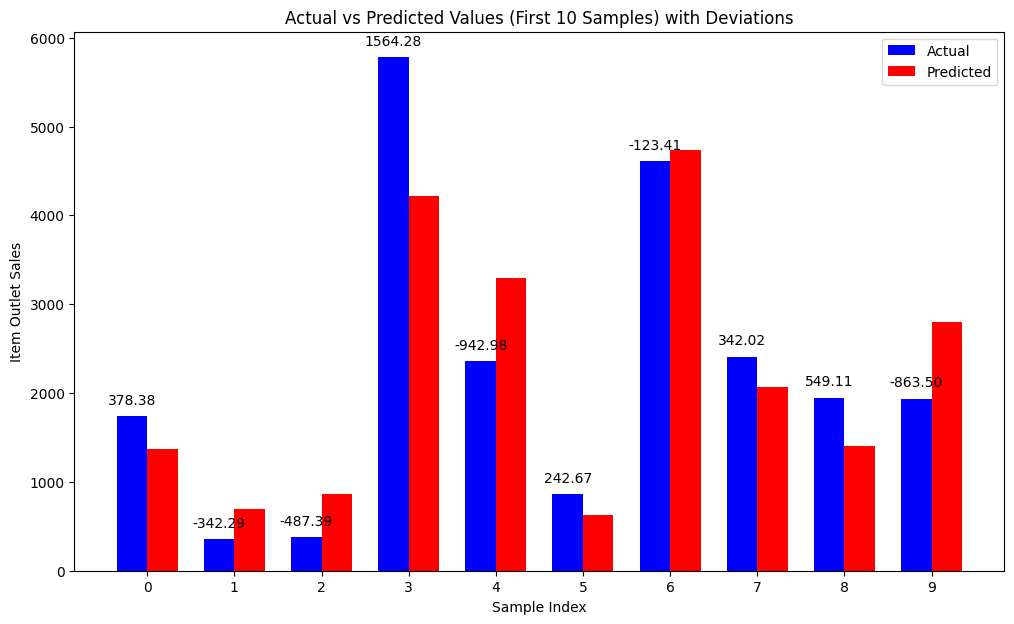

In [16]:
plt.figure(figsize=(12, 7))
bar_width = 0.35
index = np.arange(10)
deviations = y_test.values[:10] - y_pred[:10]  
plt.bar(index, y_test.values[:10], bar_width, label="Actual", color='blue')
plt.bar(index + bar_width, y_pred[:10], bar_width, label="Predicted", color='red')
for i in range(10):
    plt.text(i, y_test.values[i] + 100, f"{deviations[i]:.2f}", ha='center', va='bottom', color='black')
plt.title("Actual vs Predicted Values (First 10 Samples) with Deviations")
plt.xlabel("Sample Index")
plt.ylabel("Item Outlet Sales")
plt.xticks(index + bar_width / 2, index)
plt.legend()
plt.show()

In [17]:
# Initialize simpler models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=5, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=42),
    'XGBoost': XGBRegressor(objective='reg:squarederror', n_estimators=100, random_state=42)
}

In [18]:
# Train and evaluate each model
results = {}
for model_name, model in models.items():
    model.fit(x_train, y_train)
    y_ped = model.predict(x_test)
    mse = mean_squared_error(y_test, y_ped)
    r2 = r2_score(y_test, y_ped)
    results[model_name] = {'MSE': mse, 'R2 Score': r2}

In [19]:
# Display the results
print(pd.DataFrame(results).T)

                            MSE  R2 Score
Linear Regression  1.147837e+06  0.577686
Random Forest      8.423631e+05  0.690076
Gradient Boosting  3.134122e+05  0.884689
XGBoost            4.500578e+04  0.983441


In [20]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor

# Define the parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the XGBoost Regressor
xgb = XGBRegressor(objective='reg:squarederror', random_state=42)

# Use GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid,
    scoring='r2',
    cv=5,
    n_jobs=-1
)

# Fit the model to the training data
grid_search.fit(x_train, y_train)


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None,
                                    random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.8, 0.9, 1.0]},
             scoring='r2')

In [24]:
best_xgb_model = grid_search.best_estimator_
best_params = grid_search.best_params_

In [25]:
from sklearn.metrics import mean_squared_error, r2_score

# Predict on the test set using the best XGBoost model
y_pred_best_xgb = best_xgb_model.predict(x_test)

# Calculate Mean Squared Error and R² Score
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Output the results
print("Best Hyperparameters:", best_params)
print("Mean Squared Error (Best XGBoost):", mse_best_xgb)
print("R² Score (Best XGBoost):", r2_best_xgb)

Best Hyperparameters: {'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.9}
Mean Squared Error (Best XGBoost): 39747.08882305308
R² Score (Best XGBoost): 0.9853761859590567


In [28]:
x_train

,Item_MRP,Outlet_Identifier,Outlet_Type_Supermarket Type3,Outlet_Size_Medium,Outlet_Type_Supermarket Type1,Outlet_Location_Type_Tier 2,Years_Since_Establishment,Outlet_Location_Type_Tier 3,Item_Type_Fruits and Vegetables,Item_Type_Snack Foods,...,Item_Type_Frozen Foods,Item_Type_Others,Item_Type_Soft Drinks,Item_Type_Health and Hygiene,Outlet_Type_Supermarket Type2,Outlet_Establishment_Year,Item_Visibility_Bins,Item_Visibility_Log,Item_Visibility,Outlet_Size_Small
549,171.3448,2348.313868,0.0,1.0,1.0,0.0,25,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1999,0.0,0.034600,0.035206,0.0
7757,170.5422,2191.402497,0.0,0.0,1.0,1.0,22,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2002,0.0,0.046381,0.047473,1.0
764,111.7202,2279.085001,0.0,0.0,1.0,0.0,27,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1997,1.0,0.073364,0.076122,1.0
6867,41.6138,2194.440927,0.0,0.0,1.0,1.0,22,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2002,0.0,0.029409,0.029845,1.0
2716,155.5630,2275.748834,0.0,0.0,1.0,0.0,27,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1997,1.0,0.128594,0.137228,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5734,139.1838,339.457048,0.0,0.0,0.0,0.0,26,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1998,2.0,0.251805,0.286345,1.0
5191,75.6670,2341.798546,0.0,0.0,1.0,1.0,17,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,2007,1.0,0.111161,0.117575,1.0
5390,237.3590,2188.125154,0.0,0.0,1.0,1.0,22,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,2002,0.0,0.018766,0.018944,1.0
860,117.9466,2341.422099,0.0,0.0,1.0,1.0,17,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2007,1.0,0.052937,0.054363,1.0
